# Projeto de Análise de Dados - IDHM Brasil

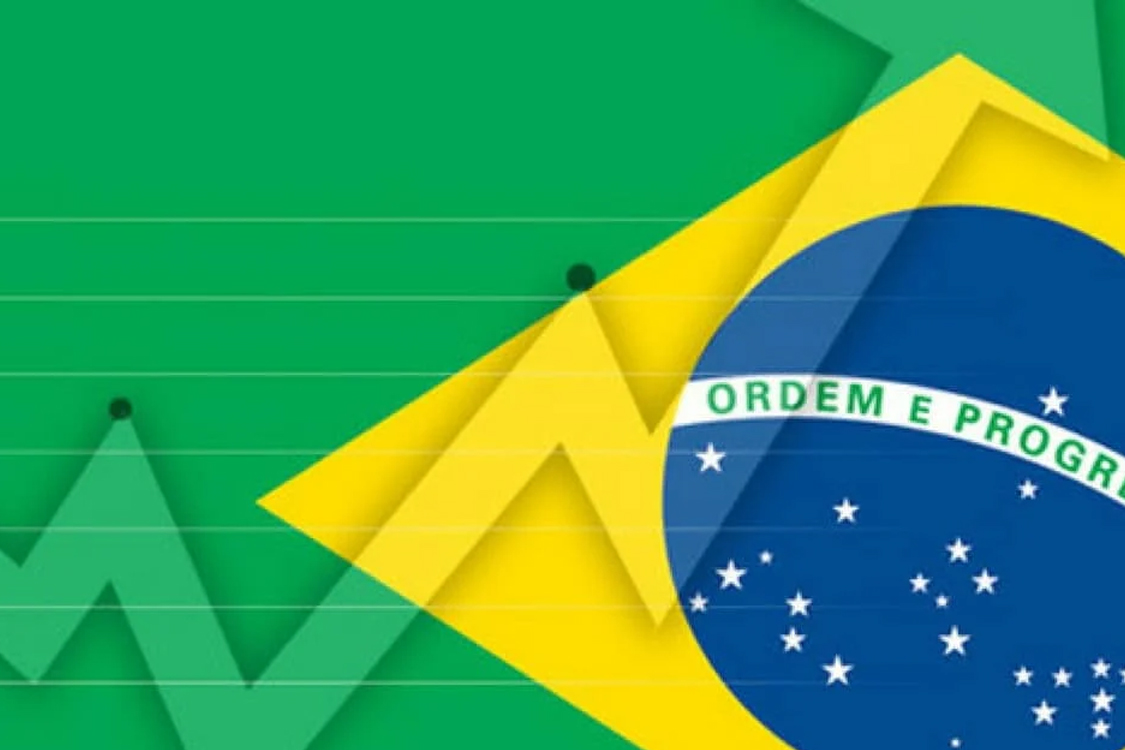

## 1. Contextualização

**Municípios Brasileiros**

Um dos candidatos à presidência do Brasil solicitou a uma consultoria um levantamento de diversas informações sobre os municípios brasileiros. Com isso, pretende estudar algumas características e propor políticas adequadas para as áreas da Educação, Saúde e aumento de Renda. Considerando a base de dados brazil_cities.xlsx , extraia dos dados as seguintes informações para auxiliar o candidato:


**1 - Panorama geral**

O primeiro indicador a ser analisado é o índice de desenvolvimento humano (IDHM), uma medida composta de indicadores de três dimensões do desenvolvimento humano: longevidade, educação e renda. O índice varia de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano. 

a) Interessado a saber quais são os municípios com piores IDHM, você decidiu utilizar o conceito de quartis. Qual seria o valor que separaria os 25% dos municípios com IDHM mais baixos?

b) Considerando esses municípios com menor IDHM, há uma concentração em algum estado ou distrito?

Dica: utilize o conceito de Pareto.

c) A ONU classifica os países seguindo o seguinte intervalo para o valor de IDH:

• < 0,550: Baixo

• 0,550 - 0,699: Médio

• 0,700 - 0,799: Alto

• >= 0,800: Muito Alto

Replicando essa classificação ao IDHM dos municípios, qual seria a sua análise da situação atual do Brasil e cada região?


**2 - Educação Infantil**

d) Construa um boxplot da variável IDHM_Educacao por região: NO, NE, SE, S e CO. Comente as diferenças e semelhanças entre os gráficos.

e) Para a região com a menor média da variável IDHM_Educacao, identifique os municípios que estão acima do 3º quartil em relação a quantidade de crianças com idade entre 1 e 4 anos (variável IBGE_1-4).

f) Identifique também os municípios que estão no 1º quartil em relação a quantidade de empresas de educação (variável COMP_P).

g) Considerando as análises anteriores, proponha uma ordem de priorização para investimento na educação dessa região.


**3 - Faixa do IDH**

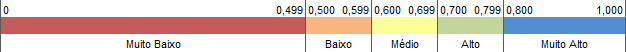

## 2. Pacotes e Bibliotecas

In [10]:
import pandas as pd
import openpyxl
import helper as h

## 3. Carga dos dados

In [2]:
df_raw = pd.read_excel(r'data\brazil_cities.xlsx', engine='openpyxl',sheet_name='Base',header=3)
df_regiao = pd.read_excel(r'data\brazil_cities.xlsx', engine='openpyxl',sheet_name='De-Para_Estado_Regiao',header=1, usecols=[1,2])
display(df_raw.head(3))
display(df_regiao.head(3))

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0


,Estado,Região
0,AC,Norte
1,AL,Nordeste
2,AM,Norte


## 4. Descrição dos dados

Feature | Descrição | Tipo
------- | --------- | ----
Município | Municípios Brasileiros | Qualitativa Nominal
Estado | Estados Brasileiros | Qualitativa Nominal
IBGE_1-4 | Senso IBGE de crianças com idade entre 1 a 4 anos | Quantitativa Contínua
IDHM | Índice de Desenvolvimento Humano Municipal (Ver faixa na contextualização) | Quantitativa Contínua
IDHM_Renda | Padrão de vida medido pela Renda Nacional Bruta per capita | Quantitativa Contínua
IDHM_Educacao | Acesso ao conhecimento medido pela média de anos de educação de adultos e expectativa de anos de escolaridade para crianças na idade de iniciar a vida escolar | Quantitativa Contínua
GDP_CAPITA | PIP (Produto Interno Bruto) | Quantitativa Contínua
COMP_P | Quantidade de empresas de educação | Quantitativa Contínua

### 4.1 Tipo das variáveis (features)

In [3]:
df_raw.dtypes

Município         object
Estado            object
IBGE_1-4         float64
IDHM             float64
IDHM_Renda       float64
IDHM_Educacao    float64
GDP_CAPITA       float64
COMP_P           float64
dtype: object

### 4.2 Dimensões, Valores NaN, Dados Duplicados

In [4]:
print(f'As dimensões do Dataframe são: {df_raw.shape}')
print('\n')
print(f'Valores NaN existentes no conjunto de dados:')
print(df_raw.isna().sum())
print('\n')
print(f'Valores duplicados existentes no conjunto de dados: {df_raw.duplicated().sum()}')

As dimensões do Dataframe são: (5576, 8)


Valores NaN existentes no conjunto de dados:
Município        0
Estado           0
IBGE_1-4         8
IDHM             8
IDHM_Renda       8
IDHM_Educacao    8
GDP_CAPITA       3
COMP_P           3
dtype: int64


Valores duplicados existentes no conjunto de dados: 3


### 4.3 Limpeza de valores NaN e Duplicidade

In [5]:
df1 = df_raw.copy()

In [6]:
df1.drop_duplicates(inplace=True)

In [7]:
df1.dropna(inplace=True)

In [8]:
print(f'As dimensões do Dataframe são: {df1.shape}')
print('\n')
print(f'Valores NaN após a limpeza realizada acima')
print(df1.isna().sum())
print('\n')
print(f'Valores duplicados após a limpeza: {df1.duplicated().sum()}')

As dimensões do Dataframe são: (5564, 8)


Valores NaN após a limpeza realizada acima
Município        0
Estado           0
IBGE_1-4         0
IDHM             0
IDHM_Renda       0
IDHM_Educacao    0
GDP_CAPITA       0
COMP_P           0
dtype: int64


Valores duplicados após a limpeza: 0


## 5. Resumo dos dados

In [9]:
df2 = df1.copy()

### 5.1 Estatística Descritiva (Unidimensional)

#### 5.1.1 Tabela de Frequências

In [11]:
# Município

h.frequencias_cat(df2,'Município')

,Município,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Bom Jesus,5,0.09,0.09
1,São Domingos,5,0.09,0.18
2,Planalto,4,0.07,0.25
3,Santa Helena,4,0.07,0.32
4,Vera Cruz,4,0.07,0.39
...,...,...,...,...
5288,Goianinha,1,0.02,110.92
5289,Eusébio,1,0.02,110.94
5290,Santo Antônio Do Sudoeste,1,0.02,110.96
5291,Sabinópolis,1,0.02,110.98


In [12]:
# Estado

h.frequencias_cat(df2,'Estado')

,Estado,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,MG,853,15.33,15.33
1,SP,645,11.59,26.92
2,RS,496,8.91,35.83
3,BA,416,7.48,43.31
4,PR,399,7.17,50.48
5,SC,293,5.27,55.75
6,GO,246,4.42,60.17
7,PI,224,4.03,64.20
8,PB,223,4.01,68.21
9,MA,217,3.90,72.11


In [15]:
# IBGE_1-4

h.frequencias_num(df2,'IBGE_1-4',15000)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(5.0, 15005.0]",5484,98.60,98.60
1,"(15005.0, 30005.0]",52,0.93,99.53
2,"(30005.0, 45005.0]",9,0.16,99.69
3,"(45005.0, 60005.0]",8,0.14,99.83
4,"(60005.0, 75005.0]",1,0.02,99.85
5,"(75005.0, 90005.0]",2,0.04,99.89
6,"(90005.0, 105005.0]",2,0.04,99.93
7,"(105005.0, 120005.0]",0,0.00,99.93
8,"(120005.0, 135005.0]",2,0.04,99.97
9,"(135005.0, 150005.0]",1,0.02,99.99


In [26]:
# IDHM

h.frequencias_num(df2,'IDHM',0.1)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(0.418, 0.518]",98,1.76,1.76
1,"(0.518, 0.618]",1731,31.12,32.88
2,"(0.618, 0.718]",2344,42.14,75.02
3,"(0.718, 0.818]",1377,24.75,99.77
4,"(0.818, 0.918]",13,0.23,100.00
5,"(0.918, 1.018]",0,0.00,100.00
6,"(1.018, 1.118]",0,0.00,100.00
7,"(1.118, 1.218]",0,0.00,100.00
8,"(1.218, 1.318]",0,0.00,100.00
9,"(1.318, 1.418]",0,0.00,100.00


In [27]:
# IDHM_Renda

h.frequencias_num(df2,'IDHM_Renda',0.1)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(0.4, 0.5]",133,2.39,2.39
1,"(0.5, 0.6]",1808,32.50,34.89
2,"(0.6, 0.7]",2047,36.80,71.69
3,"(0.7, 0.8]",1519,27.31,99.00
4,"(0.8, 0.9]",56,1.01,100.01
5,"(0.9, 1.0]",0,0.00,100.01
6,"(1.0, 1.1]",0,0.00,100.01
7,"(1.1, 1.2]",0,0.00,100.01
8,"(1.2, 1.3]",0,0.00,100.01
9,"(1.3, 1.4]",0,0.00,100.01


In [28]:
# IDHM_Educacao

h.frequencias_num(df2,'IDHM_Educacao',0.1)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(0.207, 0.307]",14,0.25,0.25
1,"(0.307, 0.407]",270,4.85,5.10
2,"(0.407, 0.507]",1433,25.76,30.86
3,"(0.507, 0.607]",2025,36.40,67.26
4,"(0.607, 0.707]",1553,27.92,95.18
5,"(0.707, 0.807]",266,4.78,99.96
6,"(0.807, 0.907]",2,0.04,100.00
7,"(0.907, 1.007]",0,0.00,100.00
8,"(1.007, 1.107]",0,0.00,100.00
9,"(1.107, 1.207]",0,0.00,100.00


In [30]:
# GDP_CAPITA

h.frequencias_num(df2,'GDP_CAPITA',15000)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(3190.57, 18190.57]",3149,56.63,56.63
1,"(18190.57, 33190.57]",1557,28.00,84.63
2,"(33190.57, 48190.57]",532,9.57,94.20
3,"(48190.57, 63190.57]",168,3.02,97.22
4,"(63190.57, 78190.57]",68,1.22,98.44
5,"(78190.57, 93190.57]",27,0.49,98.93
6,"(93190.57, 108190.57]",17,0.31,99.24
7,"(108190.57, 123190.57]",12,0.22,99.46
8,"(123190.57, 138190.57]",6,0.11,99.57
9,"(138190.57, 153190.57]",5,0.09,99.66


In [33]:
# COMP_P

h.frequencias_num(df2,'COMP_P',1000)

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(0.0, 1000.0]",5062,99.78,99.78
1,"(1000.0, 2000.0]",4,0.08,99.86
2,"(2000.0, 3000.0]",3,0.06,99.92
3,"(3000.0, 4000.0]",3,0.06,99.98
4,"(4000.0, 5000.0]",0,0.00,99.98
5,"(5000.0, 6000.0]",0,0.00,99.98
6,"(6000.0, 7000.0]",1,0.02,100.00
7,"(7000.0, 8000.0]",0,0.00,100.00
8,"(8000.0, 9000.0]",0,0.00,100.00
9,"(9000.0, 10000.0]",0,0.00,100.00
